<a href="https://colab.research.google.com/github/Marcionc/primeiro-projeto-python/blob/main/Exercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [315]:
df = pd.read_excel('exercio_questao_3_SFA.xlsx')
pd.set_option('display.precision',2)
plt.rcParams['figure.figsize'] = {11,7}

In [316]:
# Formula SFA

#V = Vendas Reais (entrada de pedidos dos clientes)
#Pi = Previsão fornecida pela área i (Comercial, Marketing, Distribuidores)
#Se V > Pi então SFA = 1 – ABS (V – Pi)/V
#Se Pi >= V então SFA = 1 – ABS (V – Pi)/Pi
#Se V = Pi = 0 então SFA = 1
#Exemplo: Vendas = 9; Previsão Mkt = 10; SFA = 1 – ABS( 9 – 10 )/ 10 = 0,90 ou 90%

v = df['Vendas Reais']

In [317]:
# função
def calcular_assertividade(df, pi, v, assertividade):
  for index, row in df.iterrows():
    if pi.loc[index] >= v.loc[index]:
        assertividade.loc[index] = (1 - abs(v[index] - pi[index]) / pi[index])*100
    elif v.loc[index] > pi.loc[index] :
        assertividade.loc[index] = (1 - abs(v[index] - pi[index]) / v[index])*100
    else:
        assertividade.loc[index] = 1 * 100


In [318]:
pi = df['Comercial']

df['Comercial Assertividade %'] = np.nan

assertividade = df['Comercial Assertividade %']

calcular_assertividade(df, pi, v, assertividade)


In [319]:
pi = df['Marketing']

df['Marketing Assertividade %'] = np.nan

assertividade = df['Marketing Assertividade %']

calcular_assertividade(df, pi, v, assertividade)

In [320]:
pi = df['Distribuidores']

df['Distribuidores Assertividade %'] = np.nan

assertividade = df['Distribuidores Assertividade %']

calcular_assertividade(df, pi, v, assertividade)

In [321]:
#3.1. a implementação do SFA, calculando-o para todos os itens e as três áreas que
#proveram estimativas de vendas. Apresente o resultado numa tabela (dataframe)
#mostrando o SFA de cada item para cada área que fez a estimativa;

df


,Produto,Família,Vendas Reais,Comercial,Marketing,Distribuidores,Comercial Assertividade %,Marketing Assertividade %,Distribuidores Assertividade %
0,ADE-1,Adega,100,80,120,110,80.00,83.33,90.91
1,ADE-2,Adega,80,75,112,114,93.75,71.43,70.18
2,ADE-3,Adega,70,120,50,80,58.33,71.43,87.50
3,ADE-4,Adega,90,95,60,90,94.74,66.67,100.00
4,MIC-1,Micro-Ondas,200,250,270,180,80.00,74.07,90.00
5,MIC-2,Micro-Ondas,300,240,400,190,80.00,75.00,63.33
6,MIC-3,Micro-Ondas,60,100,130,30,60.00,46.15,50.00
7,MIC-4,Micro-Ondas,700,300,800,500,42.86,87.50,71.43
8,MIC-5,Micro-Ondas,300,900,200,340,33.33,66.67,88.24
9,MIC-6,Micro-Ondas,50,200,300,120,25.00,16.67,41.67


In [322]:
df.to_excel('Planilha_Assertividade.xlsx')

In [323]:
from pandas.core.algorithms import value_counts
familia = df['Família']
df2 = df.groupby(by=['Família']).sum().groupby(level=[0]).cumsum()
df2



,Vendas Reais,Comercial,Marketing,Distribuidores,Comercial Assertividade %,Marketing Assertividade %,Distribuidores Assertividade %
Família,,,,,,,
Adega,340,370,342,394,326.82,292.86,348.58
Micro-Ondas,1610,1990,2100,1360,321.19,366.06,404.66
Refrigerador,1800,1800,2000,2080,142.50,195.83,257.94


In [324]:
#3.2. utilizando como critério de ponderação a venda real, determine o valor do SFA
#ponderado de cada uma das famílias de produto pra cada uma das áreas que fizeram
#estimativas de demanda;
df2['Comercial Assertividade %'] = df2['Comercial Assertividade %'] / familia.value_counts()
df2['Marketing Assertividade %'] = df2['Marketing Assertividade %'] / familia.value_counts()
df2['Distribuidores Assertividade %'] = df2['Distribuidores Assertividade %'] / familia.value_counts()
df2

,Vendas Reais,Comercial,Marketing,Distribuidores,Comercial Assertividade %,Marketing Assertividade %,Distribuidores Assertividade %
Família,,,,,,,
Adega,340,370,342,394,81.71,73.21,87.15
Micro-Ondas,1610,1990,2100,1360,53.53,61.01,67.44
Refrigerador,1800,1800,2000,2080,47.50,65.28,85.98


In [325]:
df.to_excel('Planilha_SFA_Ponderado_po_Família.xlsx')

In [326]:
#3.3. Qual o SFA ponderado considerando apenas as famílias Adega e Micro-Ondas (a
#ponderação das duas famílias juntas) e a estimativa de demanda de Marketing?

sfa_adega_micro_com =df2['Comercial Assertividade %']['Adega'] + df2['Comercial Assertividade %']['Micro-Ondas'] / 2
sfa_adega_micro_mkt = df2['Marketing Assertividade %']['Adega'] + df2['Marketing Assertividade %']['Micro-Ondas'] / 2
sfa_adega_micro_dis = df2['Distribuidores Assertividade %']['Adega'] + df2['Distribuidores Assertividade %']['Micro-Ondas'] / 2
sfa_adega_micro = (sfa_adega_micro_com + sfa_adega_micro_mkt + sfa_adega_micro_dis)/3
print("O SFA Ponderado das Famílias Adega e Micro-Ondas é de:",round(sfa_adega_micro, 2),"%")
print("A Estimativa de demanda de Marketing é de:",round(sfa_adega_micro_mkt, 2),"%")

O SFA Ponderado das Famílias Adega e Micro-Ondas é de: 111.02 %
A Estimativa de demanda de Marketing é de: 103.72 %


In [327]:
from operator import index
df3 = pd.DataFrame({
    'Produto' : df['Produto'],
    'SFA Comercial' : df['Comercial Assertividade %'],
    'SFA Marketing' : df['Marketing Assertividade %'],
    'SFA Distribuidores' : df['Distribuidores Assertividade %'],
    'Produto' : df['Produto']
})
df3

,Produto,SFA Comercial,SFA Marketing,SFA Distribuidores
0,ADE-1,80.00,83.33,90.91
1,ADE-2,93.75,71.43,70.18
2,ADE-3,58.33,71.43,87.50
3,ADE-4,94.74,66.67,100.00
4,MIC-1,80.00,74.07,90.00
5,MIC-2,80.00,75.00,63.33
6,MIC-3,60.00,46.15,50.00
7,MIC-4,42.86,87.50,71.43
8,MIC-5,33.33,66.67,88.24
9,MIC-6,25.00,16.67,41.67


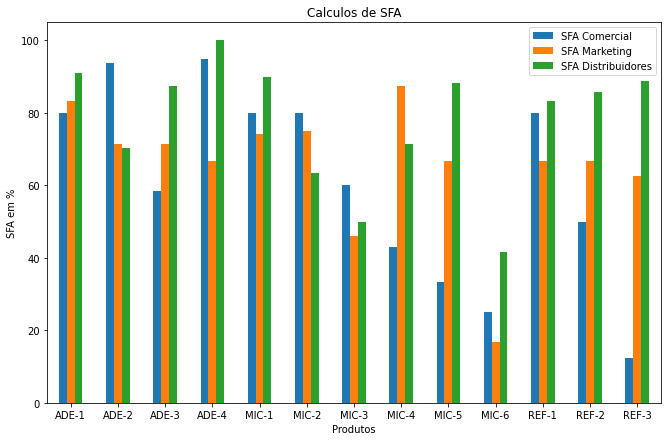

In [328]:
from logging import root
#3.4. Faça uma representação gráfica que lhe pareça apropriada para visualizar os
#dados calculados no item 3.1 (um dois eixos deverá apresentar o valor calculado do
#SFA);

df3.plot.bar(rot=0, x='Produto')
plt.title('Calculos de SFA')
plt.ylabel('SFA em %')
plt.xlabel('Produtos')
plt.show()



In [329]:
#3.5. Qual das três áreas apresentou o melhor resultado de SFA? Na sua visão, como
#essa métrica pode auxiliar a empresa a melhorar o seu processo de planejamento de
#demanda? 
#Resposta> Distribuidores apresenta melhor resultado de SFA, por aproximar-se mais de 100%se assertividade. 
#Com acesso a esses dados, a empresa pode comprar com mais inteligência, direcionando recursos para compra dos produtos que realmete precisam.